<a href="https://colab.research.google.com/github/Pilla-Divya-Vidhyasree/ml_alg/blob/main/Copy_of_tomato_leaf_disease_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pylab as plt
import cv2

In [2]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kpoviesistphane/tomato-leaf-disease-detection", force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pilladivya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kpoviesistphane/tomato-leaf-disease-detection


100%|██████████| 495M/495M [00:27<00:00, 19.1MB/s]


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
import os

from ultralytics import YOLO

In [5]:
import torch
print(torch.cuda.is_available())

True


**Data collection and Visualization**

In [6]:
import random
import glob

image_dir = '/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/train/images'
image_files = glob.glob(os.path.join(image_dir, '*.jpg'))  # Assuming images are in JPG format
selected_images = random.sample(image_files, 10)

In [7]:
import os

image_dir = '/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/train/images'
label_dir = '/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/train/labels'

In [8]:
import cv2

def load_annotations(annotation_path):
    if not os.path.exists(annotation_path):
        print(f"Warning: Annotation file not found: {annotation_path}")
        return []
    with open(annotation_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        boxes.append([int(class_id), x_center, y_center, width, height])
    return boxes


def draw_boxes(image, boxes, class_names):
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        label = class_names[int(class_id)]
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


class_names = ['Early Blight','Healthy','Late Blight','Leaf Miner','Leaf Mold','Mosaic Virus','Septoria','Spider Mites','Yellow Leaf Curl Virus']


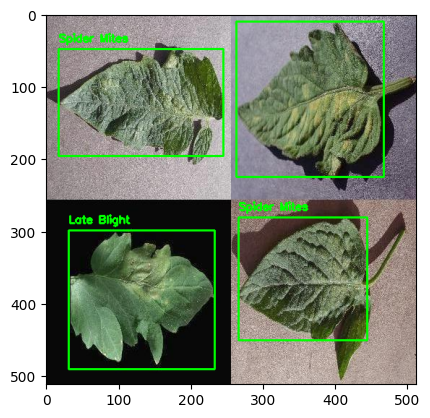

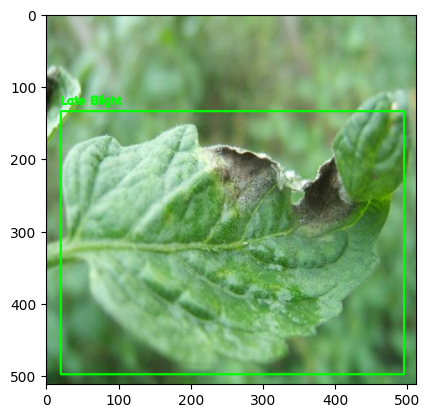

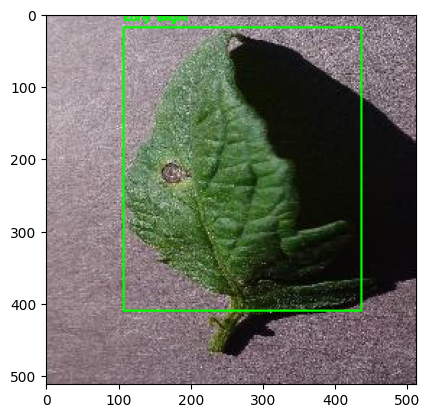

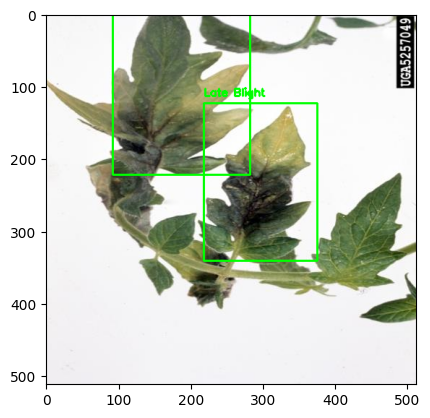

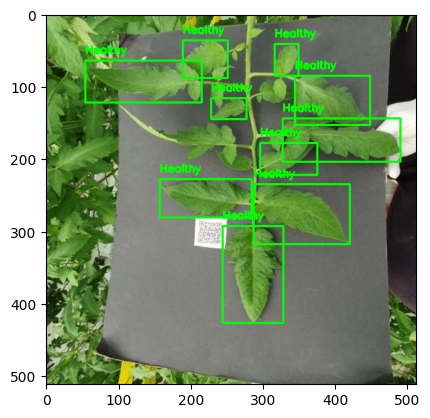

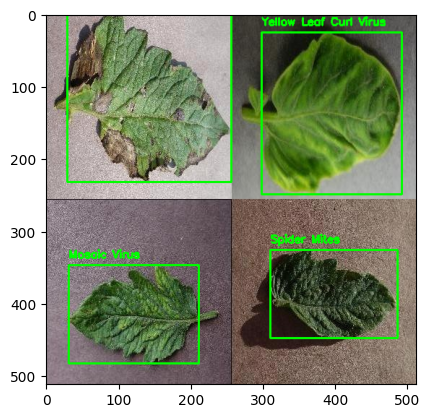

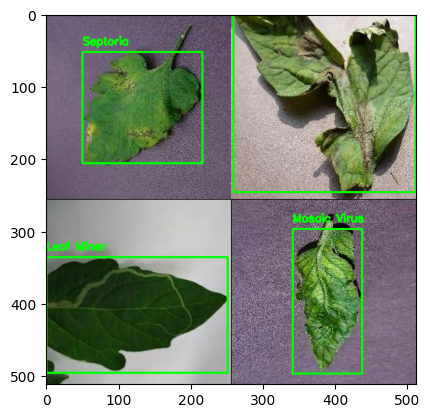

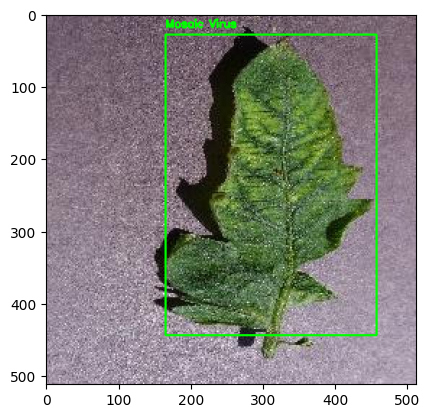

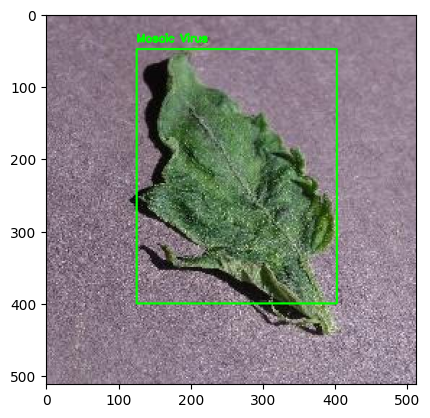

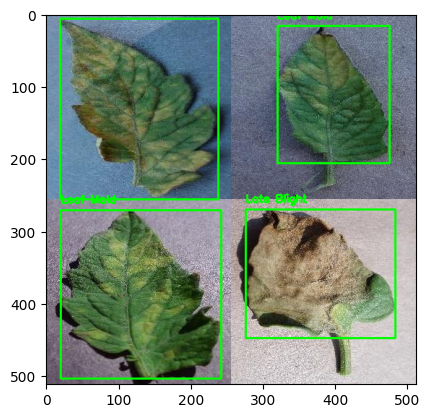

In [9]:
for image_path in selected_images:
    # Construct the annotation path using the label_dir
    annotation_filename = os.path.basename(image_path).replace('.jpg', '.txt')
    annotation_path = os.path.join(label_dir, annotation_filename)

    image = cv2.imread(image_path)
    boxes = load_annotations(annotation_path)
    draw_boxes(image, boxes, class_names)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [10]:
# Load an image using OpenCV
image = cv2.imread('/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/valid/images/0_jpg.rf.c894ea5ebaa9581203cc6cfb20558000.jpg')

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 512x512 and 3 channels.


**Model Training**

In [13]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Display model information
model.info()

YOLOv8x summary: 365 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs


(365, 68229648, 0, 258.5472512)

In [14]:
import time

start_time = time.time()

results = model.train(data = '/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/data.yaml',
                epochs = 10,
                imgsz = height,
                seed = 42,
                batch = 8,
                workers = 4,
                device = 0)

end_time = time.time()

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

100%|██████████| 755k/755k [00:00<00:00, 64.7MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 284MB/s]


AMP: checks passed ✅


train: Scanning /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/train/labels... 9037 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9037/9037 [00:15<00:00, 590.42it/s]


train: New cache created: /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/valid/labels... 843 images, 0 backgrounds, 0 corrupt: 100%|██████████| 843/843 [00:01<00:00, 465.26it/s]

val: New cache created: /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.02G     0.7369      1.559       1.22         19        512: 100%|██████████| 1130/1130 [08:27<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:21<00:00,  2.51it/s]

                   all        843       2680      0.739      0.673      0.756      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.47G     0.7582      1.203      1.254         11        512: 100%|██████████| 1130/1130 [08:15<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.87it/s]

                   all        843       2680      0.703      0.704      0.792      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.49G     0.7039      1.024       1.22         17        512: 100%|██████████| 1130/1130 [08:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.83it/s]

                   all        843       2680      0.847      0.753       0.85      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.19G     0.6477     0.8836      1.169         18        512: 100%|██████████| 1130/1130 [08:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.83it/s]

                   all        843       2680      0.898      0.804      0.906      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.47G     0.6085     0.7855      1.137         15        512: 100%|██████████| 1130/1130 [08:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.85it/s]

                   all        843       2680      0.896       0.83      0.927      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.48G     0.5778     0.6994       1.11         17        512: 100%|██████████| 1130/1130 [08:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.85it/s]

                   all        843       2680      0.893      0.848      0.931      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.47G     0.5397     0.6264      1.083         13        512: 100%|██████████| 1130/1130 [08:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.88it/s]

                   all        843       2680      0.898       0.86      0.936      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.19G     0.5097     0.5564      1.054         15        512: 100%|██████████| 1130/1130 [08:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.85it/s]

                   all        843       2680      0.909      0.885      0.955      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.49G     0.4859     0.4975      1.037         17        512: 100%|██████████| 1130/1130 [08:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:18<00:00,  2.87it/s]

                   all        843       2680      0.905      0.897      0.964      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.49G     0.4663     0.4377      1.023         20        512: 100%|██████████| 1130/1130 [08:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:19<00:00,  2.78it/s]

                   all        843       2680       0.93      0.901      0.967      0.899



10 epochs completed in 1.452 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:20<00:00,  2.57it/s]


                   all        843       2680       0.93      0.901      0.967      0.899
          Early Blight        214        252      0.908      0.917      0.973      0.928
               Healthy         76        277      0.865      0.855      0.931      0.841
           Late Blight        238        344      0.953      0.953      0.986      0.924
            Leaf Miner        199        259      0.938      0.988      0.991      0.949
             Leaf Mold        211        338      0.959      0.858       0.97      0.909
          Mosaic Virus        250        319      0.958      0.921       0.98      0.928
              Septoria        203        324      0.937      0.873      0.965      0.904
          Spider Mites        123        252      0.901      0.948      0.974      0.896
Yellow Leaf Curl Virus        152        315      0.947      0.796      0.933      0.812
Speed: 0.2ms preprocess, 16.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detec

In [15]:
print(f"Total time taken : {(end_time - start_time)/60:.2f} minutes")

Total time taken : 88.37 minutes


In [17]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

**Evaluating model Performance**

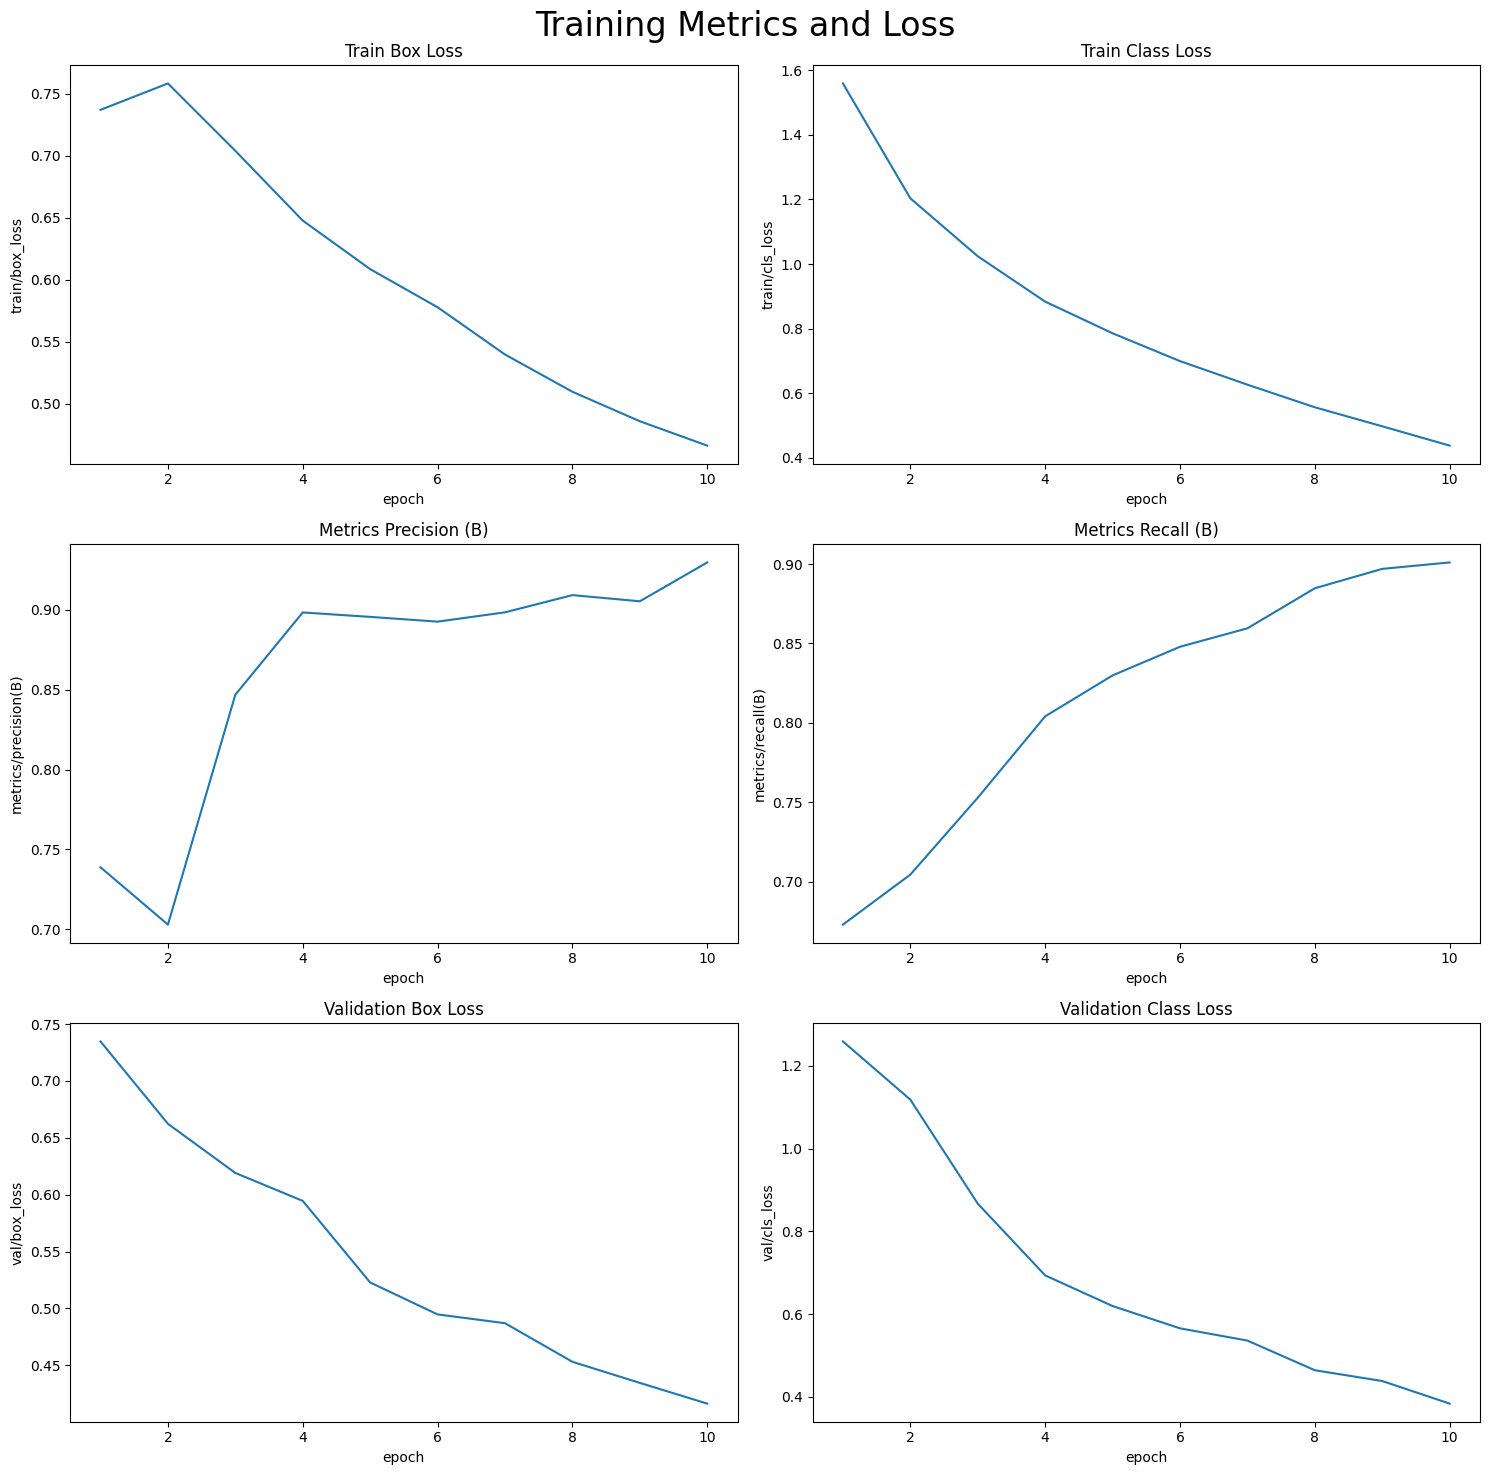

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[2,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Metrics Precision (B)')
axs[1,1].set(title='Metrics Recall (B)')
axs[2,0].set(title='Validation Box Loss')
axs[2,1].set(title='Validation Class Loss')
# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [19]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/test/labels... 164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<00:00, 634.04it/s]

val: New cache created: /content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.01it/s]


                   all        164        566      0.941       0.93      0.973      0.934
          Early Blight         56         71      0.979      0.873      0.965      0.933
               Healthy         19         68      0.909      0.868       0.95      0.881
           Late Blight         56         72      0.951          1      0.995      0.973
            Leaf Miner         46         56      0.981      0.982      0.994      0.966
             Leaf Mold         54         87       0.93      0.851      0.956      0.899
          Mosaic Virus         57         77      0.992      0.922      0.973       0.94
              Septoria         37         41      0.856          1      0.995      0.991
          Spider Mites         35         44      0.951      0.977      0.987      0.983
Yellow Leaf Curl Virus         29         50      0.918      0.899      0.939      0.843
Speed: 0.7ms preprocess, 39.5ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detec

Metrics mAP50 (B):
The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.

Metrics mAP50-95 (B):
The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.

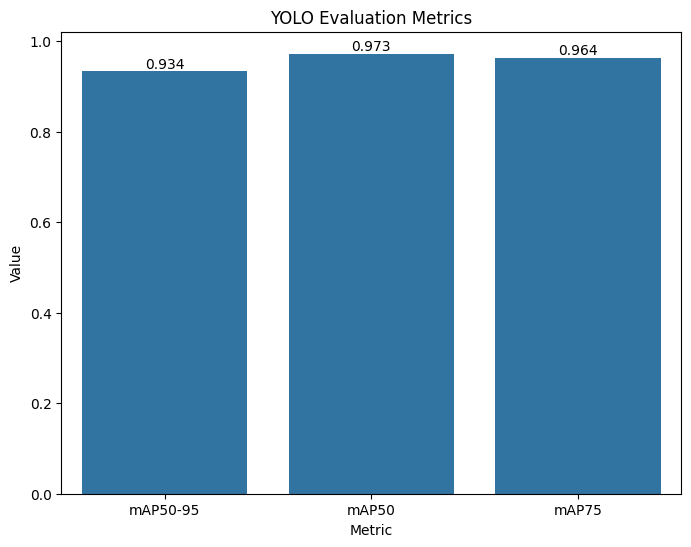

In [20]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

**Making predictions on Testing data**

In [21]:
# Function to perform ship detections
def ship_detect(img_path, model_):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model_(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 512x512 1 Early Blight, 1 Late Blight, 1 Leaf Mold, 1 Spider Mites, 56.0ms
Speed: 1.6ms preprocess, 56.0ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Mosaic Virus, 44.8ms
Speed: 1.5ms preprocess, 44.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 Late Blights, 1 Leaf Mold, 1 Septoria, 44.8ms
Speed: 1.3ms preprocess, 44.8ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Early Blight, 39.0ms
Speed: 1.5ms preprocess, 39.0ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Late Blight, 1 Mosaic Virus, 1 Spider Mites, 1 Yellow Leaf Curl Virus, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Late Blight, 2 Mosaic Viruss, 1 Spider Mites, 34.3ms
Speed: 1.5ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Early Blight, 1 Late Blight, 2 Spide

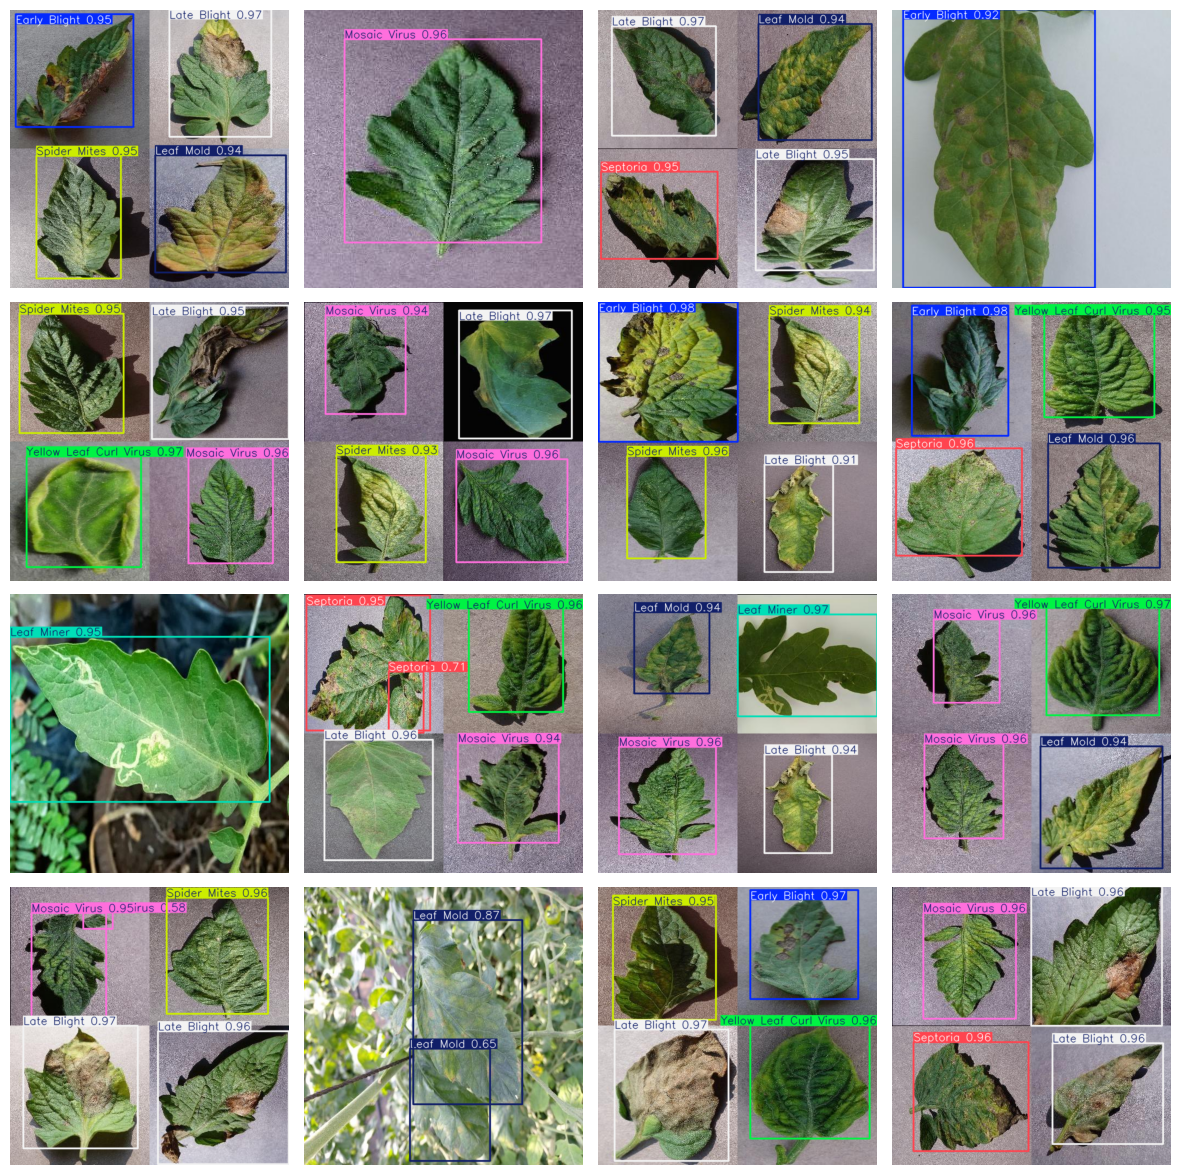

In [22]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/tomato-leaf-disease-detection/Tomato-Leaf-Disease-63/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path, model_=model)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

**Saving the model for later use**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch

torch.save(model.state_dict(), '/content/drive/MyDrive/saved_models/yolo_model_weights.pt')

In [ ]:
#for later use
'''import torch
from ultralytics import YOLO

# Create a new YOLO model instance
new_model = YOLO('yolov8x.pt')  # Use the appropriate YOLO architecture

# Load the saved weights
new_model.load_state_dict(torch.load('/content/drive/MyDrive/path/to/save/directory/yolo_model_weights.pt'))

or

model_1 = YOLO("/content/drive/MyDrive/saved_models/yolo_model_weights.pt")


model_1.eval()
'''